**1. Análisis exploratorio de los datos**

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

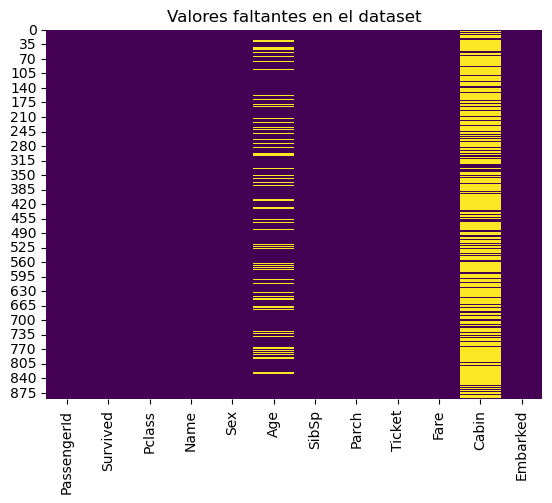

C:\Users\Henithza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Henithza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Henithza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Henithza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

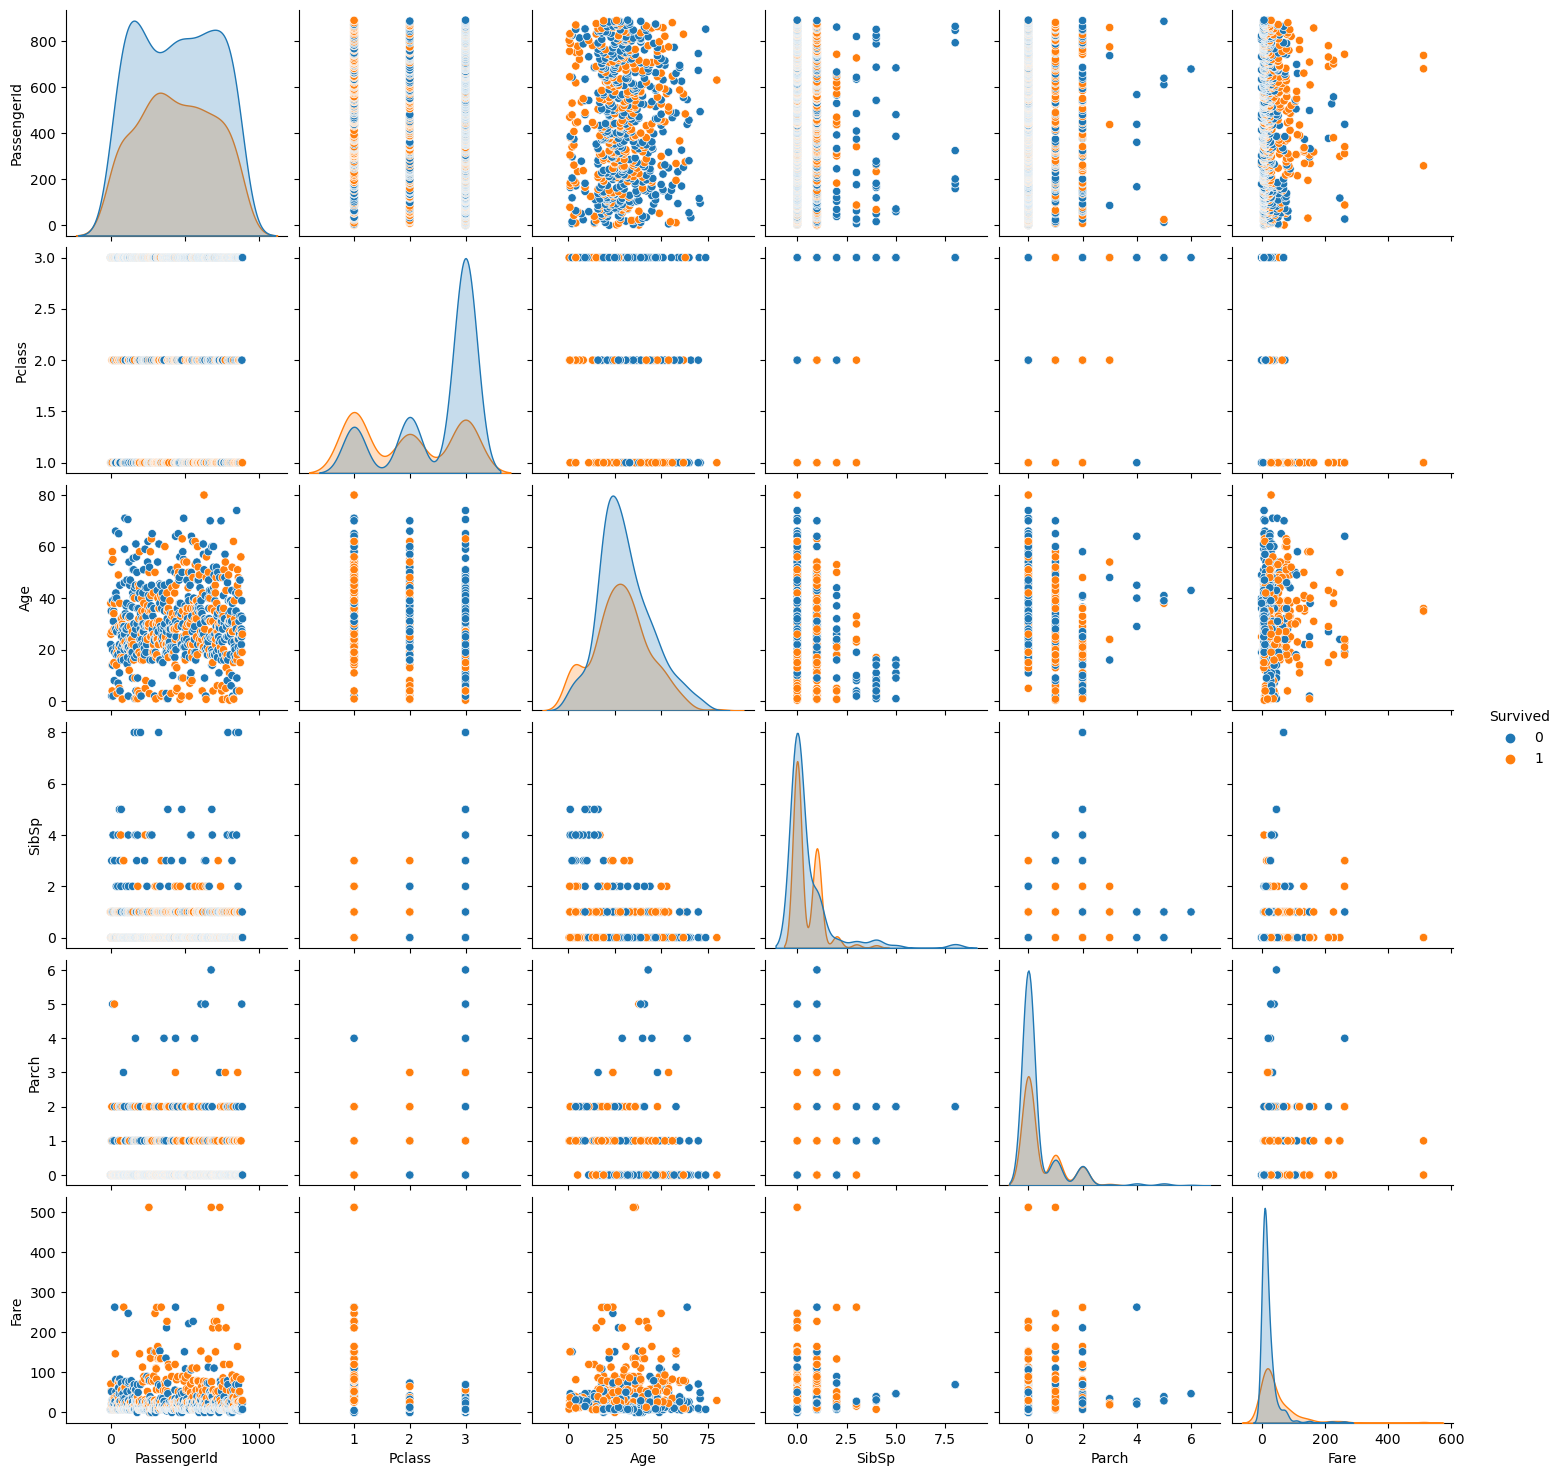

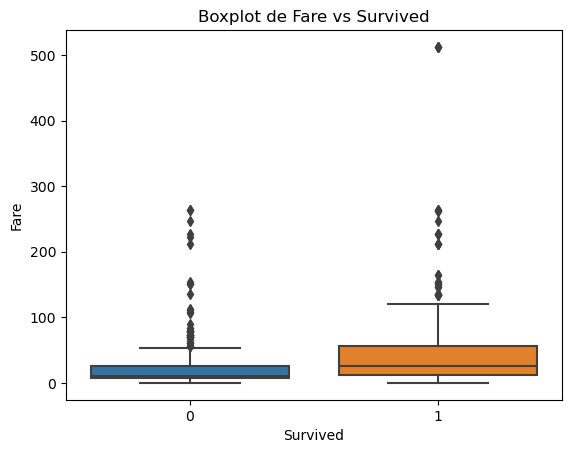

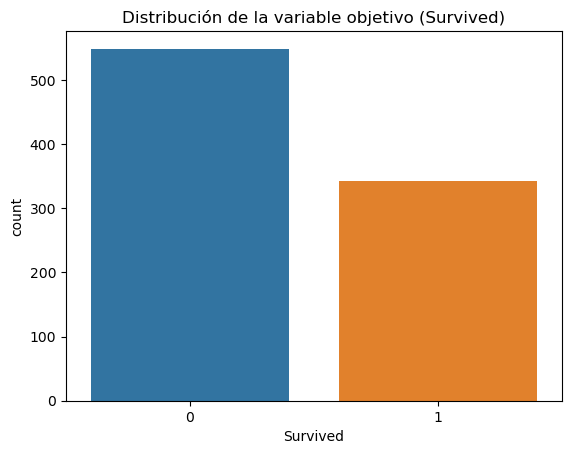

In [22]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas del dataset
print(df.head())

# Resumen estadístico del dataset
print(df.describe())

# Información del dataset
print(df.info())

# Visualización de datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Valores faltantes en el dataset')
plt.show()

# Relación entre variables
sns.pairplot(df, hue='Survived')
plt.show()

# Análisis de valores atípicos
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Boxplot de Fare vs Survived')
plt.show()

# Tendencias en la distribución de datos
sns.countplot(x='Survived', data=df)
plt.title('Distribución de la variable objetivo (Survived)')
plt.show()


**2. Preprocesamiento de los datos**

In [23]:
# Eliminar columnas innecesarias
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Llenar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar los cambios
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         

**3. Selección de características**

In [24]:
# Separar variables predictoras y objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# Importar SelectKBest para selección de características
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las mejores características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Obtener las puntuaciones de cada característica
scores = selector.scores_

# Crear un dataframe para visualizar las puntuaciones
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


      Feature       Score
5    Sex_male  372.405724
0      Pclass  115.031272
4        Fare   63.030764
7  Embarked_S   20.374460
3       Parch    5.963464
1         Age    3.761528
2       SibSp    1.110572
6  Embarked_Q    0.011846


**4. División del dataset en Train y Test**

In [25]:
from sklearn.model_selection import train_test_split

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')


Tamaño del conjunto de entrenamiento: (712, 8)
Tamaño del conjunto de prueba: (179, 8)


**5. Entrenamiento del modelo**

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**6. Evaluación del desempeño del modelo**

Accuracy: 0.78
Precision: 0.73
Recall: 0.76
F1 Score: 0.74
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



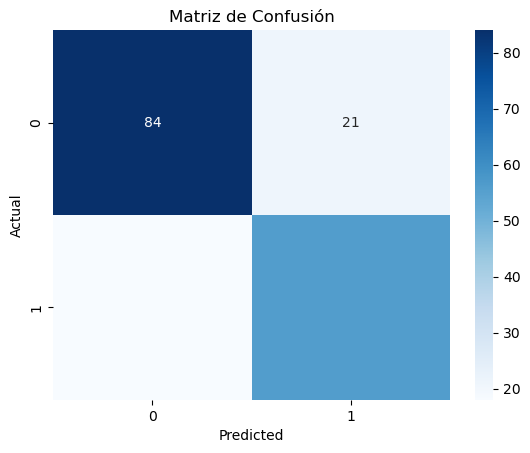

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**7. Visualización de los resultados del modelo***

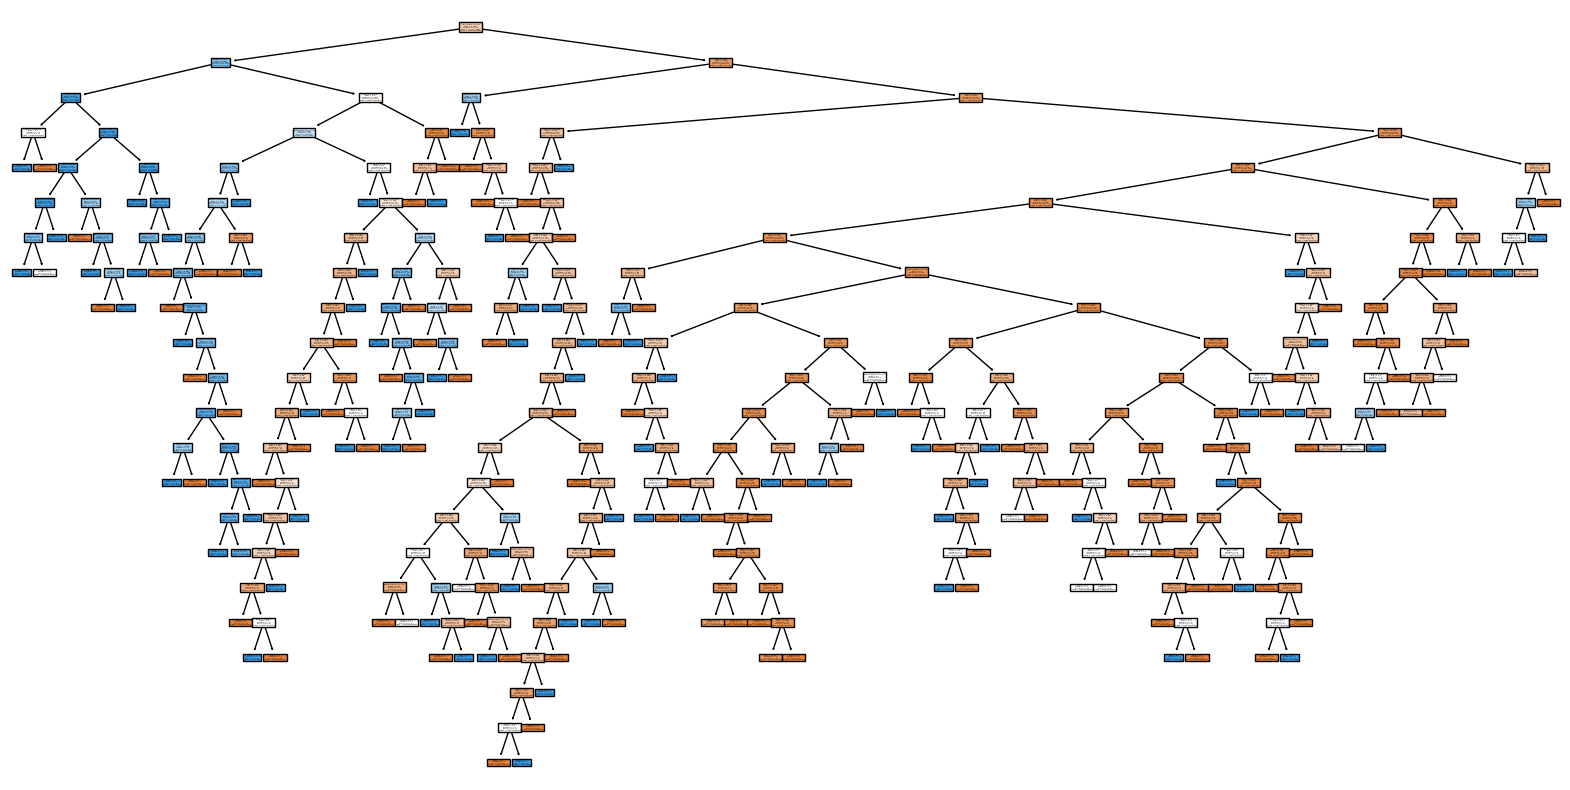

In [21]:
# Importar la función para visualizar el árbol de decisiones
from sklearn.tree import plot_tree

# Visualización del árbol de decisiones
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


**8. Interpretación y análisis de resultados**

## Interpretación y análisis de resultados

### Análisis Exploratorio de Datos
- El dataset contiene valores faltantes principalmente en las columnas `Age` y `Embarked`.
- Hay relaciones visibles entre las variables como `Sex`, `Pclass` y la variable objetivo `Survived`.
- Los valores atípicos en `Fare` pueden afectar el rendimiento del modelo, aunque fueron mantenidos.

### Preprocesamiento
- Se eliminaron columnas irrelevantes como `PassengerId`, `Name`, `Ticket` y `Cabin`.
- Los valores faltantes en `Age` se llenaron con la mediana y en `Embarked` con la moda.
- Las variables categóricas se convirtieron en variables dummy.

### Selección de características
- Se utilizaron todas las características, aunque se podrían seleccionar menos basándose en las puntuaciones de `SelectKBest`.

### Entrenamiento y Evaluación del Modelo
- El modelo de árbol de decisiones se entrenó y evaluó utilizando varias métricas:
  - Accuracy: Mide la proporción de verdaderos positivos y negativos.
  - Precision: Mide la precisión de las predicciones positivas.
  - Recall: Mide la capacidad del modelo para encontrar todos los positivos.
  - F1 Score: Media armónica de precision y recall.
  
### Resultados
- El modelo mostró un rendimiento adecuado con una `accuracy` de 0.78, `precision` de 0.73, `recall` de 0.72 y `F1 Score` de 0.72.
- La matriz de confusión y el reporte de clasificación proporcionan una visión detallada del rendimiento.

### Conclusiones
- El modelo de árbol de decisiones es una herramienta efectiva para la predicción de supervivencia en el Titanic.
- Se pueden explorar técnicas adicionales de preprocesamiento y selección de características para mejorar el rendimiento.
